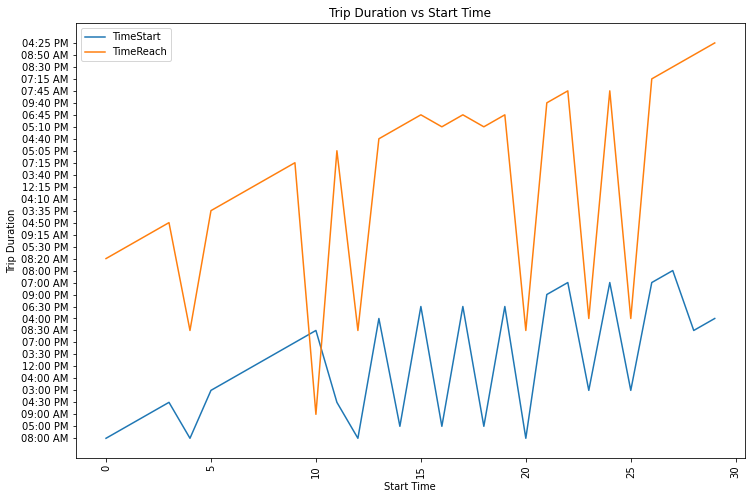

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from CSV file
df = pd.read_csv('E:\Trip_data\WK DAY.csv')

# Sort the data by start time
# df = df.sort_values(by='TimeStart')
wkd = df.head(30)
# Create a new figure with a larger size
fig = plt.figure(figsize=(12, 8))
# Create a line chart
plt.plot(wkd['TimeStart'], label = 'TimeStart')
plt.plot(wkd['TimeReach'], label = 'TimeReach')
# Set the title and axis labels
plt.title('Trip Duration vs Start Time')
plt.xlabel('Start Time')
plt.ylabel('Trip Duration')
plt.legend()
# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the chart
plt.show()

In [25]:
def convert_time_to_24_hour_format(time_str):
    # Split time string into hours, minutes and AM/PM indicator
    time_parts = time_str.split(":")
    hours = int(time_parts[0])
    minutes = int(time_parts[1][:2])
    am_pm = time_parts[1][3:]
    
    # Convert hours to 24-hour format
    if am_pm == "PM" and hours != 12:
        hours += 12
    elif am_pm == "AM" and hours == 12:
        hours = 0
    
    # Format hours and minutes as a string in 24-hour format
    hours_str = str(hours).zfill(2)
    minutes_str = str(minutes).zfill(2)
    time_24_hour_format = hours_str + ":" + minutes_str
    
    return time_24_hour_format

In [26]:
# Apply the conversion function to the StartTime column
df['TimeStart'] = df['TimeStart'].apply(convert_time_to_24_hour_format)
df['TimeReach'] = df['TimeReach'].apply(convert_time_to_24_hour_format)

In [35]:
ff = df.head(50)
time_map = dict(zip(df['TimeStart'], df['TimeReach']))
# ff
# time_map
# ff = ff.sort_values(by='TimeStart')
# print(ff.head())

In [36]:
# Create a dictionary that maps each TimeStart value to a list of TimeReach value
import collections 
time_map = {}
for index, row in ff.iterrows():
    if row['TimeStart'] not in time_map:
        time_map[row['TimeStart']] = []
    time_map[row['TimeStart']].append(row['TimeReach'])

# Sort the keys of the time_map dictionary
sorted_keys = sorted(time_map.keys())

# Create a new ordered dictionary that preserves the order of the sorted keys
ordered_time_map = collections.OrderedDict()
for key in sorted_keys:
    ordered_time_map[key] = time_map[key]

# Print the ordered_time_map dictionary
print(ordered_time_map)

OrderedDict([('04:00', ['04:10']), ('07:00', ['07:45', '07:45', '07:15']), ('08:00', ['08:20', '08:30', '08:30', '08:30', '08:30', '08:15', '08:15']), ('08:20', ['08:35', '08:35']), ('08:30', ['09:00', '08:50', '08:50', '09:00', '08:45', '08:45']), ('08:45', ['09:15']), ('09:00', ['09:15', '09:05', '09:05']), ('12:00', ['12:15']), ('15:00', ['15:35', '16:00', '16:00', '15:45']), ('15:30', ['15:40']), ('16:00', ['16:40', '16:25', '16:25', '16:40', '16:20', '16:20']), ('16:30', ['16:50', '17:05', '17:15']), ('17:00', ['17:30', '17:10', '17:10', '17:10']), ('18:00', ['18:05', '18:05']), ('18:30', ['18:45', '18:45', '18:45']), ('19:00', ['19:15']), ('20:00', ['20:30']), ('21:00', ['21:40'])])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import collections

# Define the function to convert time strings to 24-hour format
def convert_time_to_24_hour_format(time_str):
    time = pd.to_datetime(time_str).strftime('%H:%M')
    return time

# Read the CSV file into a dataframe
df = pd.read_csv('E:\Trip_data\WK DAY.csv')

# Convert the time strings in the TimeStart and TimeReach columns to 24-hour format
df['TimeStart'] = df['TimeStart'].apply(convert_time_to_24_hour_format)
df['TimeReach'] = df['TimeReach'].apply(convert_time_to_24_hour_format)

# Create a dictionary that maps each TimeStart value to a list of TimeReach values
time_map = {}
for index, row in ff.iterrows():
    if row['TimeStart'] not in time_map:
        time_map[row['TimeStart']] = []
    time_map[row['TimeStart']].append(row['TimeReach'])

# Sort the keys of the time_map dictionary
sorted_keys = sorted(time_map.keys())

# Create a new ordered dictionary that preserves the order of the sorted keys
ordered_time_map = collections.OrderedDict()
for key in sorted_keys:
    ordered_time_map[key] = time_map[key]

# Create a line chart using matplotlib
x = list(ordered_time_map.keys())
y = [ordered_time_map[key] for key in ordered_time_map.keys()]

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(len(y)):
    ax.plot([i] * len(y[i]), y[i], 'o', label=x[i])
    ax.plot([i, i], [min(y[i]), max(y[i])], '-', linewidth=2)

plt.xticks(range(len(x)), x, rotation=90)
plt.title('frequency of vehicle used at particular time')
plt.ylabel('TimeReach', color = "green")
plt.xlabel('TimeStart', color = "green")
plt.legend(loc='right')
plt.show()



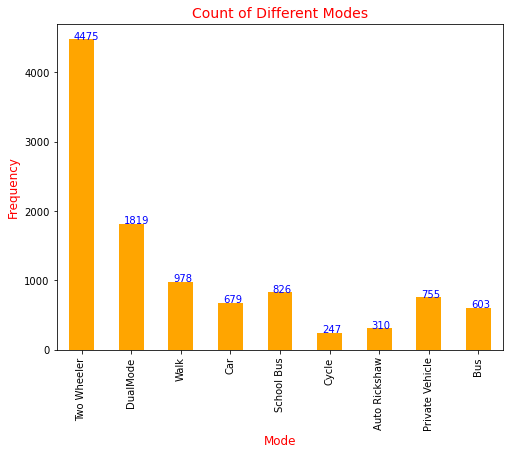

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file
df = pd.read_csv(r'E:\Trip_data\WK DAY.csv')

# Initialize dictionary to store counts
counts = {}

# Loop through rows of DataFrame
for _, row in df.iterrows():
    mode1 = row['ModeM1']
    mode2 = row['ModeM2']
    
    # Check if mode2 is missing
    if pd.isna(mode2):
        if mode1 in counts:
            counts[mode1] += 1
        else:
            counts[mode1] = 1
    else:
        # Dual mode
        key = 'DualMode'
        if key in counts:
            counts[key] += 1
        else:
            counts[key] = 1
            
# Create DataFrame from dictionary
counts_df = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])

# Sort DataFrame by counts in descending order
# counts_df = counts_df.sort_values(by='Count', ascending=False)

# Plot bar chart
ax = counts_df.plot(kind='bar', figsize=(8, 6), legend=False, color='orange')
ax.set_xlabel('Mode', fontsize=12,color="red")
ax.set_ylabel('Frequency', fontsize=12,color="red")
ax.set_title('Count of Different Modes', fontsize=14, color="red")

# Annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x()+0.1, height+1.0), fontsize=10,color="blue")

# Show plot
plt.show()


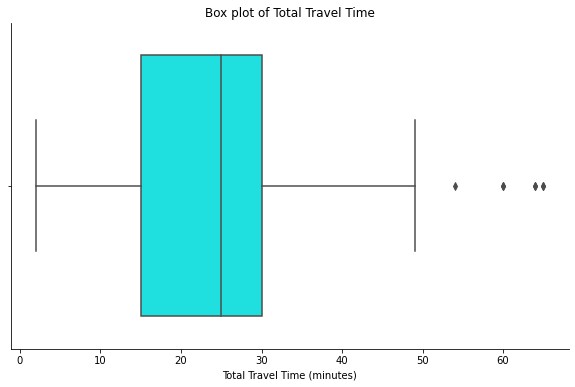

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file into a pandas DataFrame
df = pd.read_csv('E:\Trip_data\WK DAY.csv')
ff = df.head(200)
# Create a figure with a larger size
plt.figure(figsize=(10, 6))

# Create a box plot using seaborn
sns.boxplot(x='TotalTT', data=ff, color='cyan')

# Set the plot title and axes labels
plt.title('Box plot of Total Travel Time')
plt.xlabel('Total Travel Time (minutes)')

# Remove the top and right spines of the plot
sns.despine()

# Show the plot
plt.show()

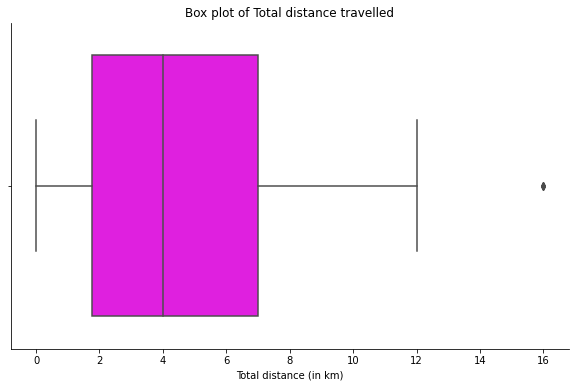

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file into a pandas DataFrame
df = pd.read_csv('E:\Trip_data\WK DAY.csv')

# Convert the 'TotalDis' column to numeric data type
df['TotalDis'] = pd.to_numeric(df['TotalDis'], errors='coerce')

# Round the 'TotalDis' column values to their nearest integer
df['TotalDis'] = df['TotalDis'].round()
ff = df.head(200)
# Create a figure with a larger size
plt.figure(figsize=(10, 6))

# Create a box plot using seaborn
sns.boxplot(x='TotalDis', data=ff, color='magenta')

# Set the plot title and axes labels
plt.title('Box plot of Total distance travelled')
plt.xlabel('Total distance (in km)')

# Remove the top and right spines of the plot
sns.despine()

# Show the plot
plt.show()

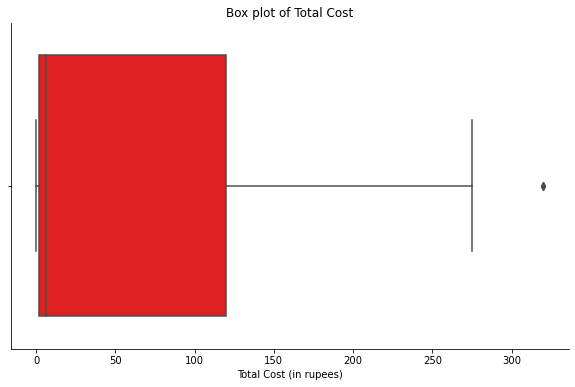

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file into a pandas DataFrame
df = pd.read_csv('E:\Trip_data\WK DAY.csv')
ff = df.head(200)
# Create a figure with a larger size
plt.figure(figsize=(10, 6))

# Create a box plot using seaborn
sns.boxplot(x='TotalCost', data=ff, color='red')
# sns.boxplot(y=ff['TotalCost'], linewidth=2.5, fliersize=5, notch=True)
# Set the plot title and axes labels
plt.title('Box plot of Total Cost')
plt.xlabel('Total Cost (in rupees)')

# Remove the top and right spines of the plot
sns.despine()

# Show the plot
plt.show()